https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

In [56]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [57]:
df = pd.read_csv(r'data.csv')

In [58]:
df.shape  #total 4269 rows

(4269, 9)

In [59]:
df.head()

,loan_id,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,loan_status
0,1,Graduate,No,9600000,29900000,12,778,2400000,Approved
1,2,Not Graduate,Yes,4100000,12200000,8,417,2700000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,Rejected
3,4,Graduate,No,8200000,30700000,8,467,18200000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,Rejected


In [60]:
df.describe()

,loan_id,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03
mean,2135.000000,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06
std,1232.498479,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06
min,1.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05
25%,1068.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06
50%,2135.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06
75%,3202.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07
max,4269.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07


In [61]:
df.info()  #8 numeric and 3 categorical data is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    loan_status               4269 non-null   object
dtypes: int64(6), object(3)
memory usage: 300.3+ KB


In [62]:
col_names = []
for i in df.columns:
    a=i.removeprefix(' ')
    col_names.append(a)
    

In [63]:
df.columns = col_names

In [64]:
df.head()

,loan_id,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,loan_status
0,1,Graduate,No,9600000,29900000,12,778,2400000,Approved
1,2,Not Graduate,Yes,4100000,12200000,8,417,2700000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,Rejected
3,4,Graduate,No,8200000,30700000,8,467,18200000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,Rejected


In [65]:
df.drop(['loan_id'],axis=1,inplace=True)

In [66]:
df.duplicated().sum()  #no duplicate 

0

In [67]:
df.isnull().sum()#null values present

education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
loan_status                 0
dtype: int64

# Univariate analysis

<AxesSubplot: xlabel='income_annum'>

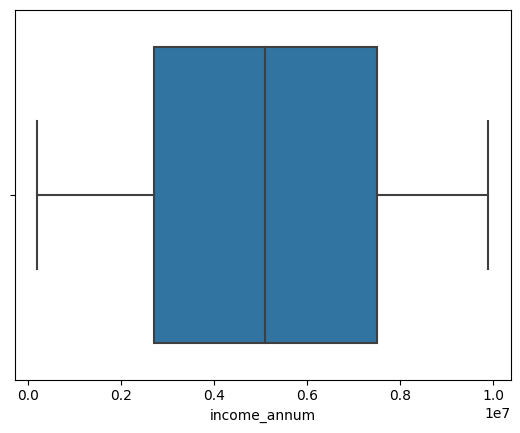

In [68]:
sns.boxplot(data=df , x='income_annum')

<AxesSubplot: xlabel='loan_amount'>

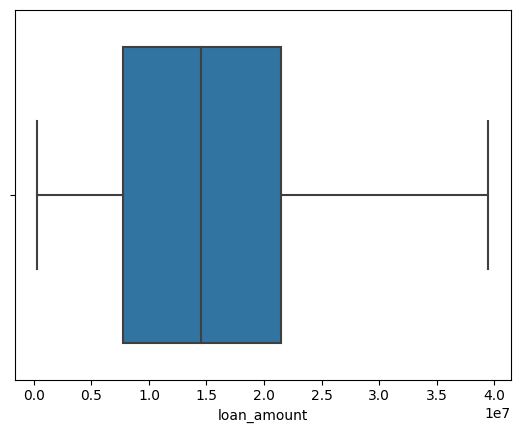

In [69]:
sns.boxplot(data=df , x='loan_amount')

<AxesSubplot: xlabel='loan_term'>

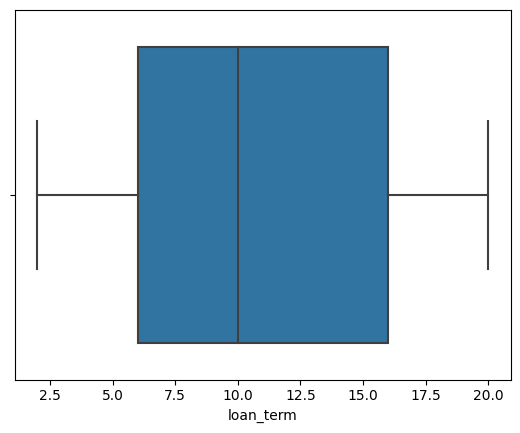

In [70]:
sns.boxplot(data=df , x='loan_term')

<AxesSubplot: xlabel='cibil_score'>

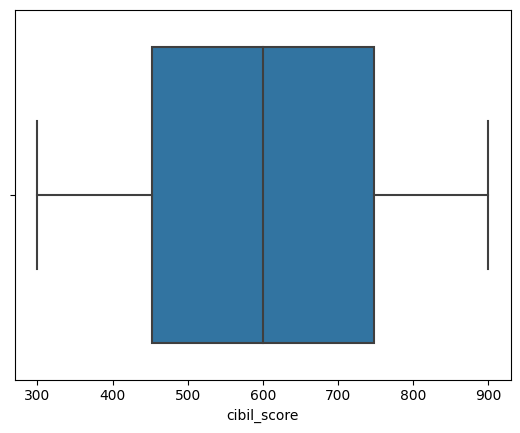

In [71]:
sns.boxplot(data=df , x='cibil_score')

<AxesSubplot: xlabel='residential_assets_value'>

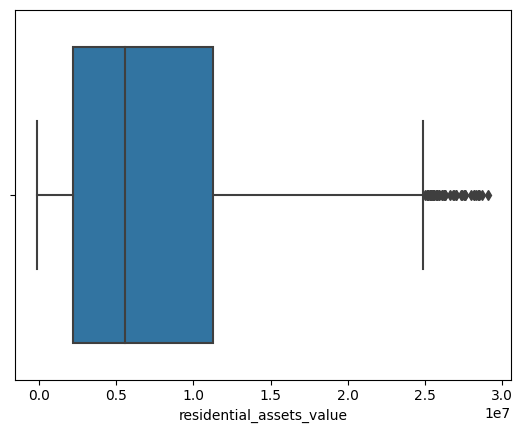

In [72]:
sns.boxplot(data=df , x='residential_assets_value')

In [73]:
Q1_res = df['residential_assets_value'].quantile(0.25)
Q3_res = df['residential_assets_value'].quantile(0.75)
iqr_res = Q3_res - Q1_res
lower_res=Q3_res - (1.5*iqr_res)
upper_res=Q3_res + (1.5*iqr_res)

In [74]:
print(len(df[df['residential_assets_value'] > upper_res]))
print(len(df[df['residential_assets_value'] < lower_res]))

52
0


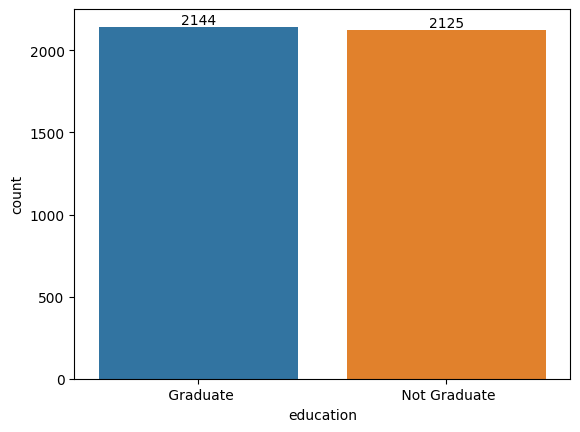

In [75]:
ax = sns.countplot(data=df, x='education')     # 2144 graduate and 2125 not graduate
for label in ax.containers:
    ax.bar_label(label)                        
plt.show()

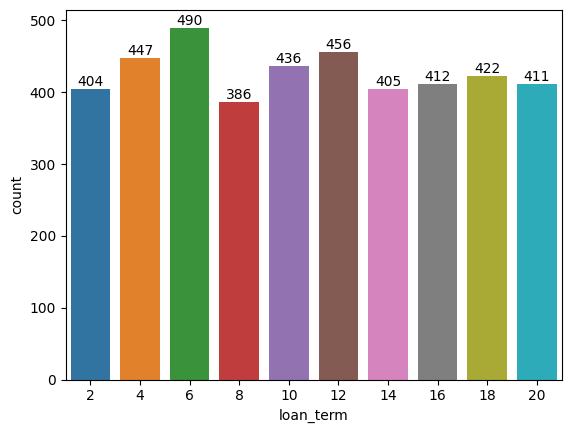

In [76]:
ax = sns.countplot(data=df, x='loan_term')     # majroity applied for 6 years , minimum was for 8 years
for label in ax.containers:
    ax.bar_label(label)                        
plt.show()

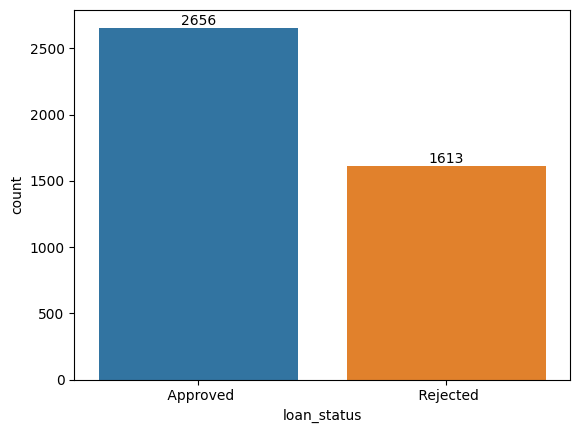

In [77]:
ax = sns.countplot(data=df, x='loan_status')     # 2656 approved anf 1613 not approved
for label in ax.containers:
    ax.bar_label(label)                        
plt.show()

<AxesSubplot: xlabel='income_annum', ylabel='Count'>

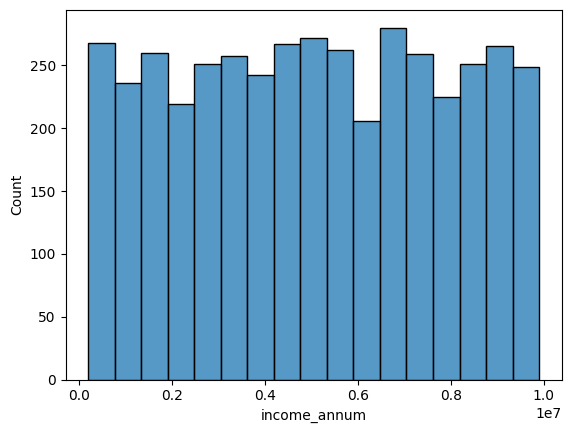

In [78]:
sns.histplot(data=df,x='income_annum')  # kind of uniformly distrbuted

# bivairate

<AxesSubplot: xlabel='loan_status', ylabel='cibil_score'>

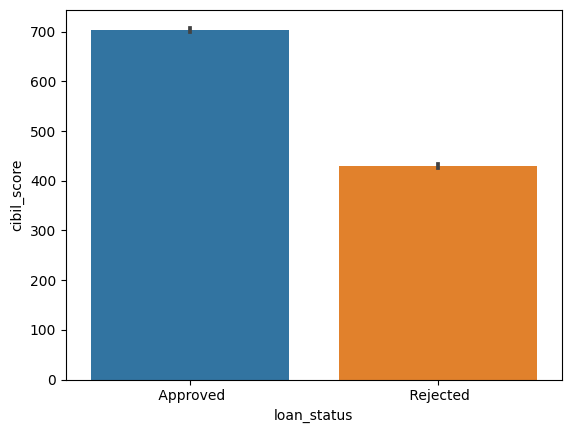

In [79]:
sns.barplot(data=df,x='loan_status' , y='cibil_score') # if cibil score is high chance of loan_approval is also high

In [80]:
pd.crosstab(df.education, df.loan_status)  # we can see education is not that significant for approval status

loan_status,Approved,Rejected
education,,
Graduate,1339,805
Not Graduate,1317,808


In [81]:
pd.crosstab(df.self_employed, df.loan_status) # similar to education , self_employed is not significant

loan_status,Approved,Rejected
self_employed,,
No,1318,801
Yes,1338,812


# Pre-processing

In [82]:
df.head()

,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,loan_status
0,Graduate,No,9600000,29900000,12,778,2400000,Approved
1,Not Graduate,Yes,4100000,12200000,8,417,2700000,Rejected
2,Graduate,No,9100000,29700000,20,506,7100000,Rejected
3,Graduate,No,8200000,30700000,8,467,18200000,Rejected
4,Not Graduate,Yes,9800000,24200000,20,382,12400000,Rejected


In [83]:
df['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

In [84]:
df["education"] = df["education"].map({" Not Graduate":0, " Graduate":1})
df["loan_status"] = df["loan_status"].map({" Approved":1, " Rejected":0})

In [85]:
self=pd.get_dummies(df['self_employed'] , drop_first=True)
df = pd.concat([df,self] , axis=1)
df.drop('self_employed',axis=1,inplace=True)

In [86]:
df.drop(df[df['residential_assets_value'] > upper_res].index , inplace=True)

In [87]:
df.head()

,education,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,loan_status,Yes
0,1,9600000,29900000,12,778,2400000,1,0
1,0,4100000,12200000,8,417,2700000,0,1
2,1,9100000,29700000,20,506,7100000,0,0
3,1,8200000,30700000,8,467,18200000,0,0
4,0,9800000,24200000,20,382,12400000,0,1


In [88]:
df.shape

(4217, 8)

In [89]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

<AxesSubplot: >

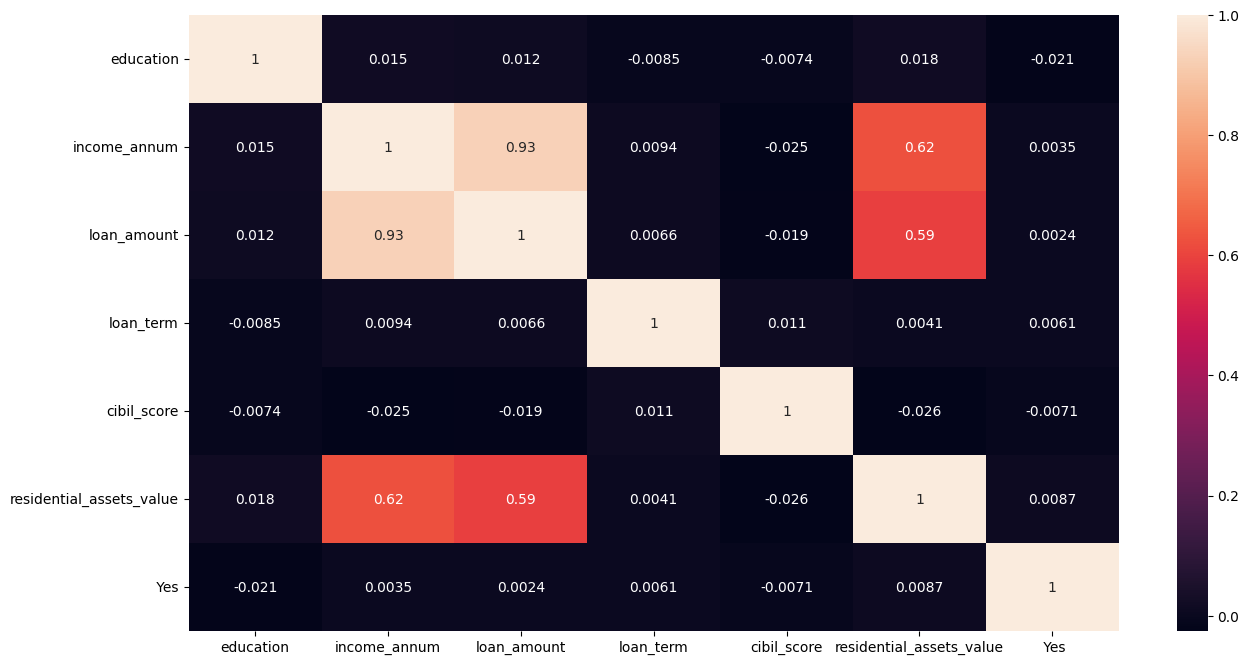

In [90]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr() , annot=True)

In [91]:
X.drop('income_annum' , axis=1 , inplace=True)

In [92]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.3 , random_state=42)

In [93]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [94]:
y_train.value_counts()

1    1861
0    1861
Name: loan_status, dtype: int64

In [95]:
model_tree = DecisionTreeClassifier(max_depth=12).fit(X_train , y_train)
pred_tree = model_tree.predict(X_test)

In [96]:
model_lr = LogisticRegression().fit(X_train , y_train)
pred_lr = model_lr.predict(X_test)

In [97]:
print(f'accuracy of Decision tree {accuracy_score(pred_tree , y_test)}')
print(f'accuracy of logistic regression {accuracy_score(pred_lr , y_test)}')

accuracy of Decision tree 0.9597156398104265
accuracy of logistic regression 0.9162717219589257


In [98]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       505
           1       0.97      0.96      0.97       761

    accuracy                           0.96      1266
   macro avg       0.96      0.96      0.96      1266
weighted avg       0.96      0.96      0.96      1266



In [99]:
X_trans=sc.transform(X)

In [100]:
cv_tree =cross_val_score(model_tree,X_trans ,y , cv = 5)
cv_lr = cross_val_score(model_lr,X_trans ,y , cv = 5)

In [101]:
cv_tree

array([0.96090047, 0.95023697, 0.95966785, 0.95966785, 0.95966785])

In [102]:
cv_lr

array([0.92890995, 0.91943128, 0.91577699, 0.91577699, 0.90628707])